# Perceptron 3

This notebook analyses the performance of a two layer perceptron on a dataset that is not linearly separable.

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.dataset import create_dataset, plot_dataset
from ann.plotting import savefig, subplots
from ann.subsampling import split_samples, SUBSAMPLINGS
from ann.two_layer_perceptron import TwoLayerPerceptron, \
                                     plot_hidden_node_influence, \
                                     plot_validation_error, \
                                     plot_decision_boundary

# Create Dataset

In [2]:
N = 100

MU_A = [1, 0.3]
SIGMA_A = 0.2
LABEL_A = -1

MU_B = [0, -0.1]
SIGMA_B = 0.3
LABEL_B = 1

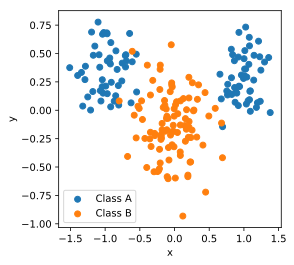

In [3]:
patterns, targets = create_dataset(
    N, [(MU_A, SIGMA_A), (MU_B, SIGMA_B)], [LABEL_A, LABEL_B],
    bias=False, mirror=[True, False])

plot_dataset(patterns, targets, bias=False)

# Influence of Hidden Nodes on Performance

Analyse how the final MSE and accuracy of a two layer perceptron depend on the width of its hidden layer.

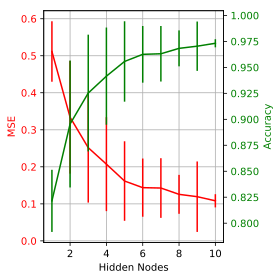

In [4]:
plot_hidden_node_influence(patterns,
                           targets,
                           hidden_nodes=range(1, 11),
                           learning_rate=0.001,
                           momentum_alpha=0.9,
                           epochs=1000,
                           runs=100)

plt.tight_layout()

savefig('hidden_node_influence.svg')

# Validation Set Error

Create learning curves for hidden layers of different widths and different subsampled training sets.

### Batch

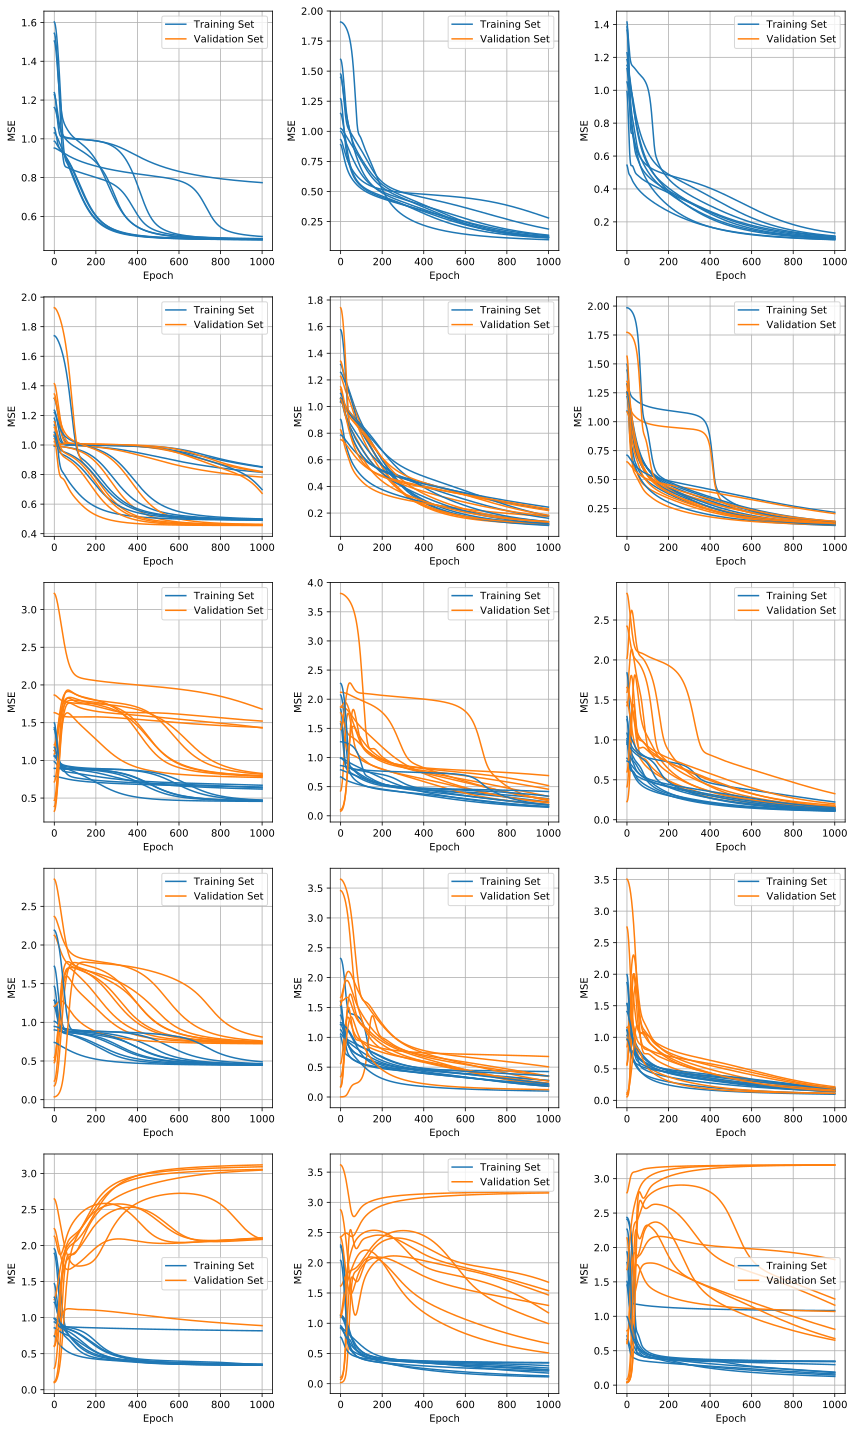

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    plot_validation_error(patterns,
                          targets,
                          SUBSAMPLINGS,
                          hidden_nodes=[1, 5, 10],
                          learning_rate=0.001,
                          momentum_alpha=0.9,
                          epochs=1000,
                          runs=10,
                          batch=True)

plt.tight_layout()

savefig('validation_error.svg')

### Sequential

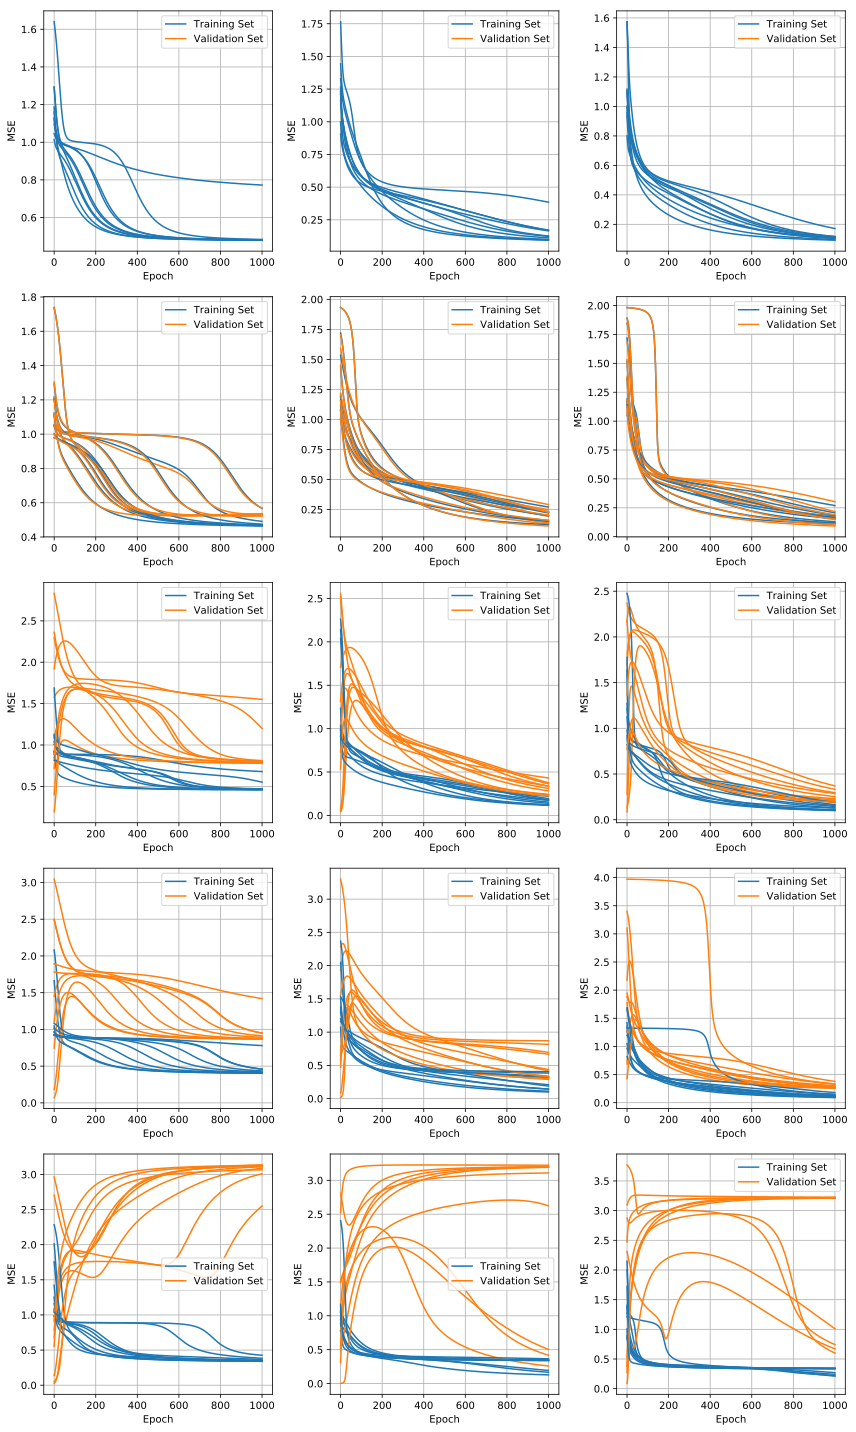

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    plot_validation_error(patterns,
                          targets,
                          SUBSAMPLINGS,
                          hidden_nodes=[1, 5, 10],
                          learning_rate=0.001,
                          momentum_alpha=0.9,
                          epochs=1000,
                          runs=10,
                          batch=False)

plt.tight_layout()

savefig('validation_error_sequential.svg')

# Decision Boundary Approximation

Plot resulting decision boundaries for two layer perceptrons with hidden layers of different widths.

In [7]:
def plot_decision_boundary_(hidden_nodes):
    subsampling = SUBSAMPLINGS[1]

    (patterns_train, targets_train), (patterns_val, targets_val) = \
        split_samples(patterns, targets, subsampling.selectors, subsampling.fractions)

    model = TwoLayerPerceptron(hidden_nodes=hidden_nodes)

    model.train(patterns_train, targets_train, learning_rate=0.001, epochs=10000)

    plot_decision_boundary(model, patterns_train, targets_train)

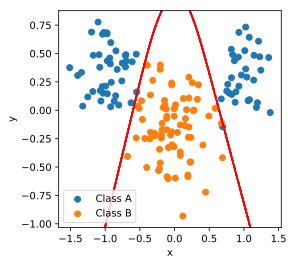

In [8]:
plot_decision_boundary_(2)

savefig('decision_boundary2.svg')

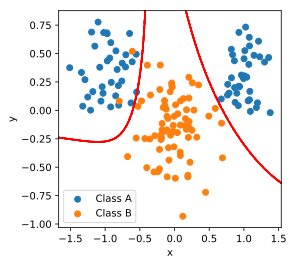

In [9]:
plot_decision_boundary_(10)

savefig('decision_boundary10.svg')